## Search for an ellipsis using Singular Value Decomposition (SVD)

In [2]:
import cv2
import numpy as np
import os
from math import *
from skimage import io
from matplotlib import pyplot as plt

In [3]:
work_dir = os.getcwd()
print("Working directory %s" % work_dir)

Working directory /Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-4-0


In [4]:
data_dir = os.path.join(work_dir, 'data')
image_path = os.path.join(data_dir, 'e1.jpg')

In [11]:
imgc = io.imread(image_path)

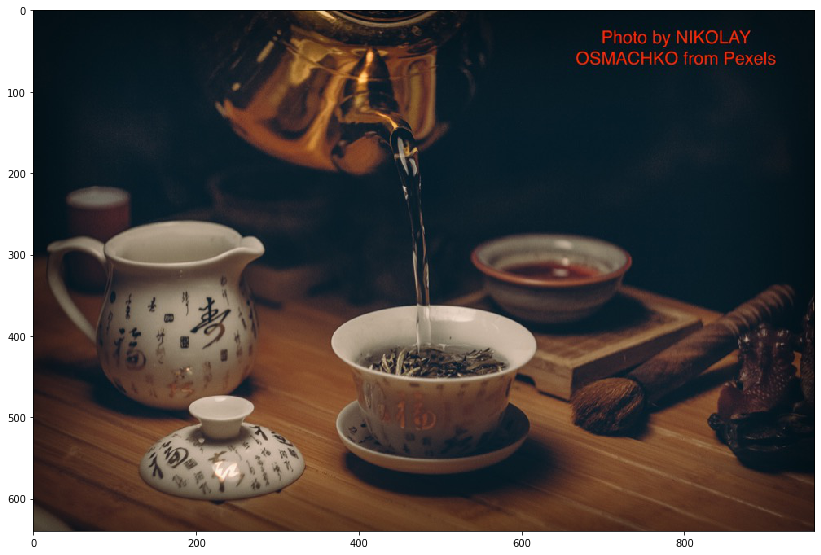

In [25]:
plt.figure(figsize=(14,12))
plt.imshow(imgc)

In [14]:
# Make copy of image for drawing circles
img = imgc.copy()

# Initialize six points
points = np.array([ [366, 407], [513, 363], [377, 426], 
                    [486, 456], [565, 449], [595, 385]], np.double)

In [16]:
m = np.zeros((6,6))
r = np.zeros((6,1))

# Set appropriate point values
for k in range(0, len(points)):
  m[k][0] = points[k][0]*points[k][0]
  m[k][1] = 2*points[k][0] * points[k][1]
  m[k][2] = points[k][1]*points[k][1]
  m[k][3] = 2*points[k][0]
  m[k][4] = 2*points[k][1]
  m[k][5] = 1
  r[k] = points[k][0]*points[k][0]

In [17]:
# Perform SVD and get resulting values from right eigenvectors
mu, ms, mv = np.linalg.svd(m)
R = mv[-1, :]

In [18]:
R /= R[0]
E = np.array([[R[0], R[1], R[3]], [R[1], R[2], R[4]],
[R[3], R[4], R[5]] ], np.double)

In [20]:
# Find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )

u =  [[-3.16914296e-04  6.52224919e-01  7.58025432e-01]
 [-2.09302841e-03 -7.58024242e-01  6.52223020e-01]
 [ 9.99997759e-01 -1.37986996e-03  1.60535400e-03]]
m1v.T =  [[-3.16914296e-04  6.52224919e-01  7.58025432e-01]
 [-2.09302841e-03 -7.58024242e-01  6.52223020e-01]
 [ 9.99997759e-01 -1.37986996e-03  1.60535400e-03]]
v =  [[-3.16914296e-04 -2.09302841e-03  9.99997759e-01]
 [ 6.52224919e-01 -7.58024242e-01 -1.37986996e-03]
 [-7.58025432e-01 -6.52223020e-01 -1.60535400e-03]]
usv =  [[ 1.00000000e+00 -1.67096196e-01 -4.22883658e+02]
 [-1.67096196e-01  7.02911117e+00 -2.79287746e+03]
 [-4.22883658e+02 -2.79287746e+03  1.33436954e+06]]


In [21]:
# Draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))

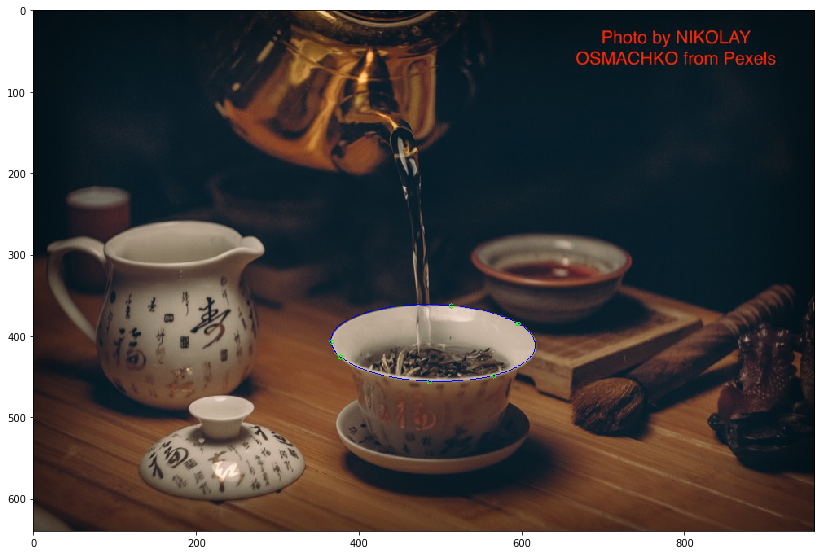

In [24]:
plt.figure(figsize=(14,12))
plt.imshow(img)

We can see that we have found ellipsis on the tea cup using six different points and Singular Value Decomposition.